In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline
import math

In [2]:
delta = 0.1
L = 6. 
N = int(L/delta) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)

In [3]:
def V(z):
    return z**2

E = 3

In [4]:
psil = np.zeros(2*N+1)
psil[0]=0
psil[1]=2.558835322304587e-10
psir = np.zeros(2*N+1)
psir[-1]=0
psir[-2]=2.79*2.558835322304587e-10

In [5]:
potential = np.array([V(delta*k) for k in range(-N,N+1)]) # Values of U(y) stored at lattice points

In [6]:
def k2(j):
    return (E - potential[j]) 
k2_array=abs(E-potential[N:2*N+1])
turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N

In [7]:
for i in range(2,2*N+1):
    psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
for i in range(2*N-2,-1,-1):
    psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)

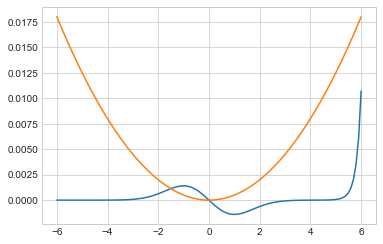

In [8]:
plt.plot(x, psil, label="eigenfunction")
plt.plot(x, 0.0005 * potential, label="Potential")

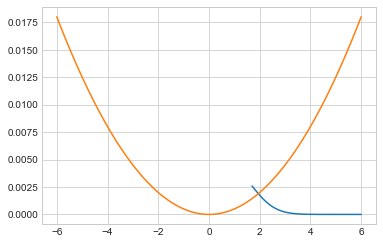

In [9]:
plt.plot(x[turningpt_index:2*N+1], psir[turningpt_index:2*N+1], label="eigenfunction")
plt.plot(x, 0.0005 * potential, label="Potential")

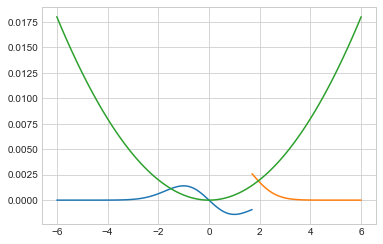

In [10]:
plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")

In [11]:
psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]

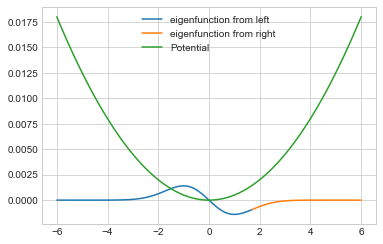

In [12]:
plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir_scaled[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")
plt.legend()

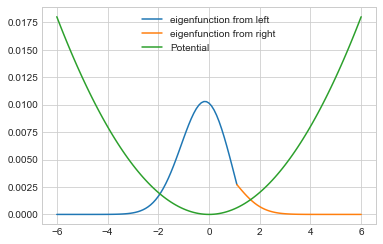

In [19]:
# wrong energies
#E = 1.32501
E = 1.2

psil = np.zeros(2*N+1)
psil[0]=0
psil[1]=2.558835322304587e-10
psir = np.zeros(2*N+1)
psir[-1]=0
psir[-2]=2.558835322304587e-10

def k2(j):
    return (E - potential[j]) 
k2_array=abs(E-potential[N:2*N+1])
turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N

for i in range(2,2*N+1):
    psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
for i in range(2*N-2,-1,-1):
    psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)

psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]

plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir_scaled[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")
plt.legend()

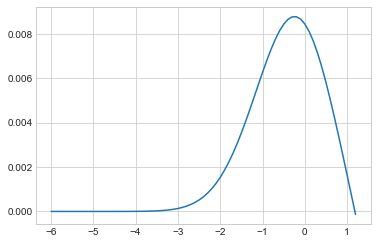

In [14]:
plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from right")


In [15]:
(psir_scaled[turningpt_index-1]-psil[turningpt_index-1])/psil[turningpt_index]

6.7629143930075

In [18]:
def deriv_diff(E):
    def k2(j):
        return (E - potential[j]) 
    k2_array=abs(E-potential[N:2*N+1])
    turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N
    psil = np.zeros(2*N+1)
    psil[0]=0
    psil[1]=2.558835322304587e-10
    psir = np.zeros(2*N+1)
    psir[-1]=0
    psir[-2]=2.79*2.558835322304587e-10
    for i in range(2,2*N+1):
        psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
    for i in range(2*N-2,-1,-1):
        psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)
    psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]
    return (psir_scaled[turningpt_index-1]-psil[turningpt_index-1])/psil[turningpt_index]

In [72]:
deriv_diff(1.3250000000000002887)

6.769449833791143

In [74]:
deriv_diff(1.01)

-0.004905766222693729

In [75]:
deriv_diff(.99)

0.004732459813388464

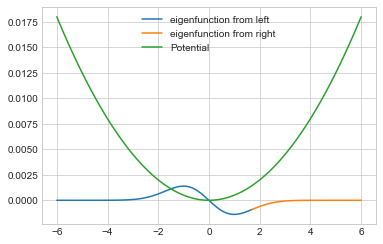

In [25]:
a = 3.43
b = 2.59
c = (a + b) / 2
while (deriv_diff(c) > 0.001):
  c = (a + b) / 2
  if deriv_diff(c) == 0:   
    break
  elif deriv_diff(a) * deriv_diff(c) < 0:
    b = c
  else:
    a = c
    
E = c

psil = np.zeros(2*N+1)
psil[0]=0
psil[1]=2.558835322304587e-10
psir = np.zeros(2*N+1)
psir[-1]=0
psir[-2]=2.558835322304587e-10

def k2(j):
    return (E - potential[j]) 
k2_array=abs(E-potential[N:2*N+1])
turningpt_index = np.where(k2_array==min(k2_array))[0][0] + N

for i in range(2,2*N+1):
    psil[i]= (2*(1-5/12*delta**2*k2(i-1))*psil[i-1]-(1+delta**2*k2(i-2)/12)*psil[i-2])/(1+delta**2*k2(i)/12)
for i in range(2*N-2,-1,-1):
    psir[i]= (2*(1-5/12*delta**2*k2(i+1))*psir[i+1]-(1+delta**2*k2(i+2)/12)*psir[i+2])/(1+delta**2*k2(i)/12)

psir_scaled=psir*psil[turningpt_index]/psir[turningpt_index]

plt.plot(x[0:turningpt_index+1], psil[0:turningpt_index+1], label="eigenfunction from left")
plt.plot(x[turningpt_index:2*N+1], psir_scaled[turningpt_index:2*N+1], label="eigenfunction from right")
plt.plot(x, 0.0005 * potential, label="Potential")
plt.legend()